### Teach a Neural Network to Read Handwriting

The goal for all the networks we examine is the same: take an input image (28x28 pixels) of a handwritten single digit (0–9) and classify the image as the appropriate digit.
The MNIST data is beginner-friendly and is small enough to fit on one computer.

In [1]:
import sys
import numpy as np

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#from mm.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import os
#Disable the debugging logs
#3 = INFO, WARNING, and ERROR messages are not printed
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#load the data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

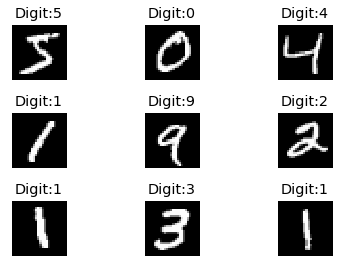

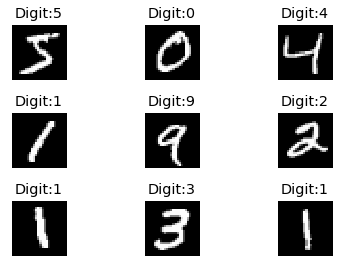

In [3]:
fig = plt.figure()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i] , cmap='gray' , interpolation = 'none')
    plt.title("Digit:{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    
fig

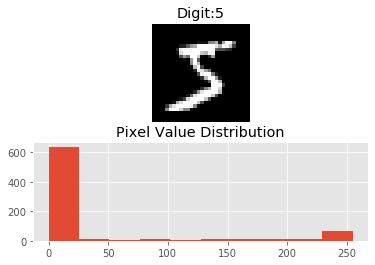

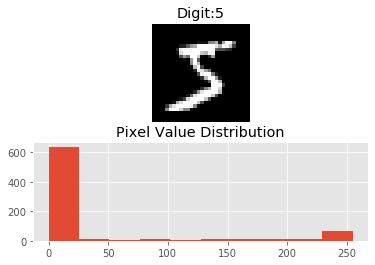

In [4]:
fig = plt.figure()


plt.subplot(2,1,1)

plt.imshow(X_train[0] , cmap='gray' , interpolation = 'none')
plt.title("Digit:{}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

#hist plot

Our input data must be a vector. Instead of several 28x28 images, we’ll have several vectors that are all length 784 (28*28=784). This is flattening process.

Keras provides a simple utility to help us flatten the 28x28 pixels into a vector

In [5]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training from 0-255 to 0-1
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

In [7]:
n_classes = 10
print("shape before one-hot encoding: " , y_train.shape)
Y_train = np_utils.to_categorical(y_train , n_classes)
Y_test = np_utils.to_categorical(y_test , n_classes)
print("shape agter one-hot encding: " , Y_train.shape) 

shape before one-hot encoding:  (60000,)
shape agter one-hot encding:  (60000, 10)


Building a linear stack of layers with the sequential model.

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

compiling the sequential model

In [13]:
model.compile(loss = 'categorical_crossentropy' , metrics=['accuracy'], optimizer='adam')

Training the model and saving metrics in history

In [14]:
history = model.fit(X_train , Y_train ,
                   batch_size=150 , epochs=30,
                   verbose =2, validation_data=(X_test , Y_test))
#saving the model

save_dir = "C:/Users/Pavani/Desktop/internship_eckovation"
model_name = 'Keras_MNIST.h5'
model_path = os.path.join(save_dir,model_name)
model.save(model_path)
print('Saved model at %s' % model_path)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 11s - loss: 0.2580 - accuracy: 0.9226 - val_loss: 0.1059 - val_accuracy: 0.9671
Epoch 2/30
 - 9s - loss: 0.1032 - accuracy: 0.9685 - val_loss: 0.0757 - val_accuracy: 0.9752
Epoch 3/30
 - 9s - loss: 0.0690 - accuracy: 0.9785 - val_loss: 0.0729 - val_accuracy: 0.9772
Epoch 4/30
 - 9s - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0654 - val_accuracy: 0.9797
Epoch 5/30
 - 9s - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 6/30
 - 9s - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0595 - val_accuracy: 0.9813
Epoch 7/30
 - 9s - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 8/30
 - 9s - loss: 0.0294 - accuracy: 0.9898 - val_loss: 0.0584 - val_accuracy: 0.9836
Epoch 9/30
 - 9s - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0645 - val_accuracy: 0.9822
Epoch 10/30
 - 9s - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0733 - val_accuracy: 0.9820
Epoch 11/30
 - 9s 

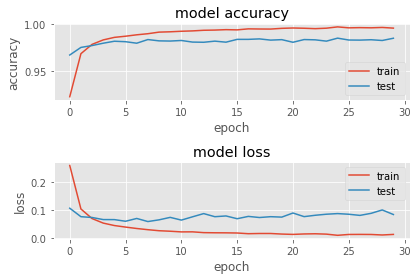

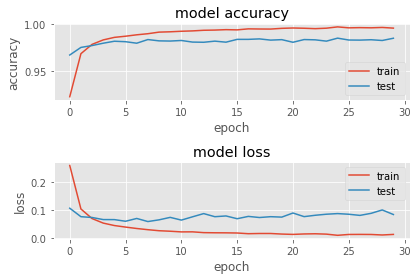

In [15]:
#plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [19]:
mnist_model = load_model('Keras_MNIST.h5')

loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)
print ("test loss: " ,loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

test loss:  0.08343690721915484
Test Accuracy 0.9850000143051147


Load model and create predictions on the test set


9850  classified correctly
150  classified incorrectly


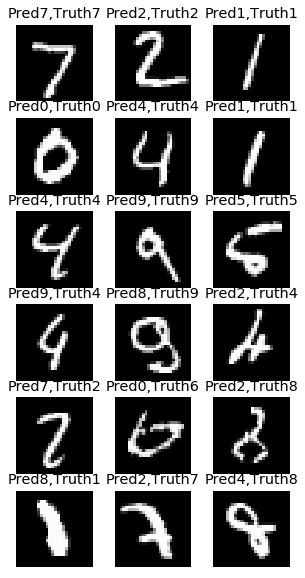

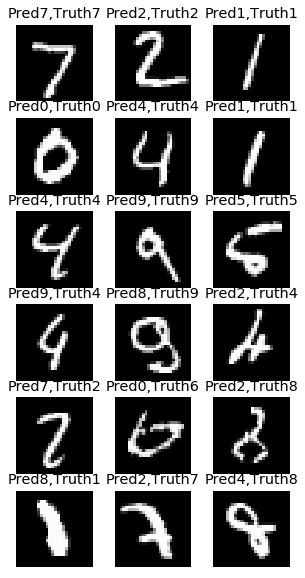

In [26]:
mnist_model=load_model('Keras_MNIST.h5')
predicted_classes = mnist_model.predict_classes(X_test)

#see which are predicted correctly

correct_indices= np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (5,10)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Pred{},Truth{}".format(predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred{},Truth{}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation